# Project_1 with Linear Regression

## Problem Statement

## We need to predict the chance of admission based on the students various scores.

#### Features or Independent variables

* GRE Score
* TOFEL Score
* University Rating
* SOP
* LOR
* CGPA
* Research

#### Label/ Target

* Chance of Admit


##### Refer sklearn official documentation if you are not sure about syntax or parameter.

https://scikit-learn.org

In [1]:
#Let's start with importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read csv file and convert into dataframe
data = pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/Admission_Prediction.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [3]:
data.shape

(500, 9)

In [4]:
# Understand data at high level. Check the statstics of data set
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
# Fill the null values
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])

data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())

data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mean())

In [6]:
# Verify if NaN's are filled

data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Now the data looks good and there are no missing values. Also, the first column is just serial numbers, so we don't need that column. Let's drop it from data and make it more clean.

In [7]:
# Dropping unwanted columns

data = data.drop(columns = ['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


Let's visualize the data and analyze the relationship between independent and dependent variables:

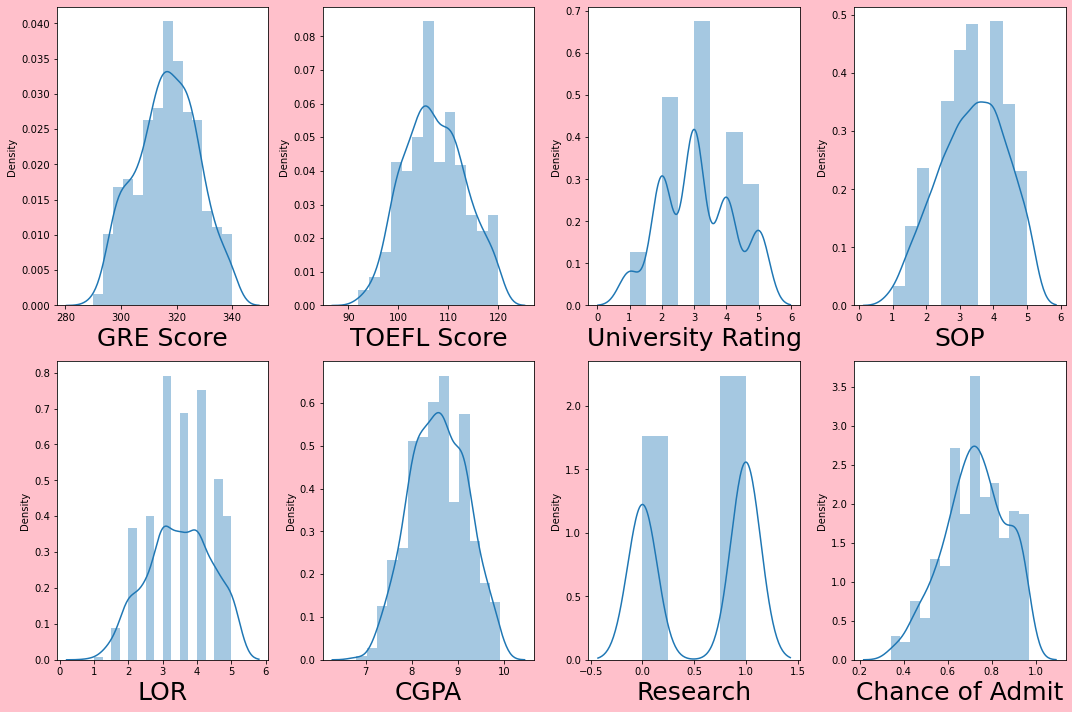

In [8]:
# Let's see how data is distributed for every column

plt.figure(figsize=(15,10), facecolor='pink')
plotnumber = 1

for column in data:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=25)
        
    plotnumber+=1
plt.tight_layout()    

The data distribution looks decent enough and there doesn't seem to be any skewness.

Let's observe the relationship between independent variables and dependent variable.

In [9]:
# Divide dataset into features and label
y = data['Chance of Admit']
X = data.drop(columns = ['Chance of Admit'])

In [10]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [11]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


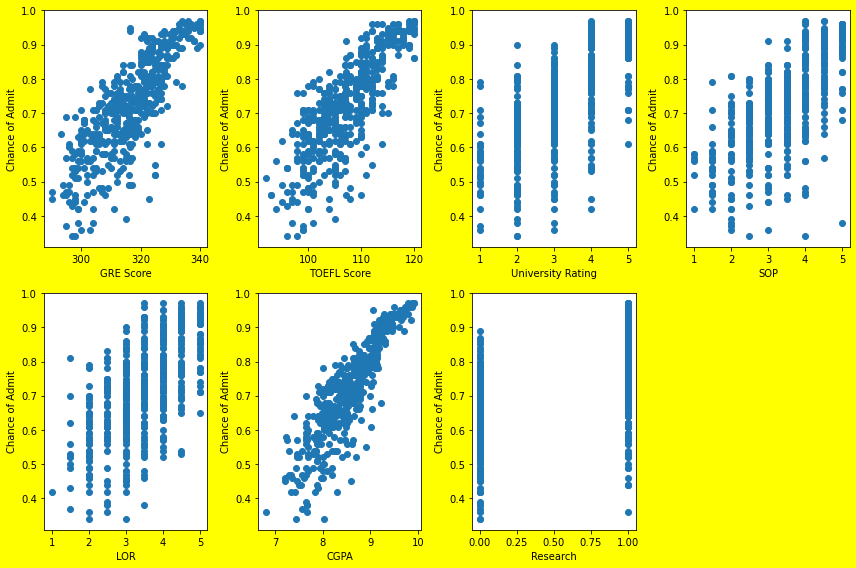

In [12]:
# Visualizing relationship

plt.figure(figsize=(12,8), facecolor = 'yellow')
plotnumber = 1

for column in X:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Chance of Admit',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()    

Great, the relationship between the dependent and independent variables look fairly linear. Thus, our linearity assumption is satisfied.

In [13]:
# Data Scaling. Formula Z = (X - mean)/ std

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [14]:
X_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

### Example for StandardScaler

In [15]:
# You can also get help within notebook and refer whenever you have any confusion.

# help(LinearRegression)

<img src = 'Std_scaler.PNG'>

Let's go ahead and use linear regression and see how good it fits our data. But first let's split our data in train and test.

### Train Test Split

<img src = 'Train_test.PNG'>

In [16]:
# Split data into train and test. Model will be built on training data and tested on test data.
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state = 5678)
y_train.head()

254    0.85
195    0.78
215    0.93
111    0.69
490    0.67
Name: Chance of Admit, dtype: float64

## Model instantiating and training

In [17]:
regression = LinearRegression()

regression.fit(x_train, y_train)

LinearRegression()

## Predict the chance of admission given features

In [18]:
data.tail(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [19]:
# Since we have already fit the scaler, you can transform the data

print ('Chance of Admission is: ', regression.predict(scaler.transform([[330.0, 120.0, 5., 4.5, 5.0, 9.56, 1]])))

Chance of Admission is:  [0.94921453]


## You can save the model and later you can use it for prediction

In [20]:
# saving the model to the local file system

lreg_model = 'finalized_model.pickle'   #This way also you can rename your file.

pickle.dump(regression, open(lreg_model, 'wb'))

# prediction using the saved model
loaded_model = pickle.load(open(lreg_model, 'rb'))

a = loaded_model.predict(scaler.transform([[327.0, 113.0, 4.0, 45, 4.5, 9.04, 0]]))

a

array([0.77378218])

In [21]:
# Let's try in new window with only pickle model. Below condition help to get the scaled data.
scaler.transform([[327.0, 113.0, 4.0, 45, 4.5, 9.04, 0]])

array([[ 0.94125895,  0.96145116,  0.78200955, 42.04594985,  1.09894429,
         0.76721964, -1.12815215]])

### Let's check how well model fits on train data

In [22]:
# Adjusted R2 score
regression.score(x_train, y_train)

0.8359206707509745

### Let's check how well model fits on test data

In [23]:
regression.score(x_test, y_test)

0.773914363232398

### Let's plot and visualize

In [24]:
y_pred = regression.predict(x_test)

y_pred

array([0.72080931, 0.5640675 , 0.92423585, 0.80338159, 0.74318717,
       0.5356461 , 0.84864514, 0.84395415, 0.8280573 , 0.71931782,
       0.61677377, 0.8588534 , 0.84753919, 0.47361368, 0.6919108 ,
       0.62981114, 0.81799374, 0.68406319, 0.58519796, 0.95912233,
       0.6846334 , 0.65581597, 0.81745416, 0.64444287, 0.44329221,
       0.67912098, 0.63123033, 0.93553784, 0.60647515, 0.69280925,
       0.77435286, 0.66566047, 0.57611661, 0.57346749, 0.52250086,
       0.79425078, 0.79066615, 0.90067584, 0.85066514, 0.78952794,
       0.62408249, 0.73653152, 0.72266734, 0.83774101, 0.62654161,
       0.63824898, 0.66906997, 0.85615519, 0.66393397, 0.67276661,
       0.85336198, 0.85308043, 0.61511996, 0.75005634, 0.97010373,
       0.74836426, 0.94921453, 0.71723105, 0.617503  , 0.75154436,
       0.94290272, 0.78831926, 0.94347403, 0.67229717, 0.6182032 ,
       0.59242298, 0.56101599, 0.60485594, 0.84546269, 0.81819453,
       0.87197165, 0.66113578, 0.75650885, 0.76431931, 0.57539

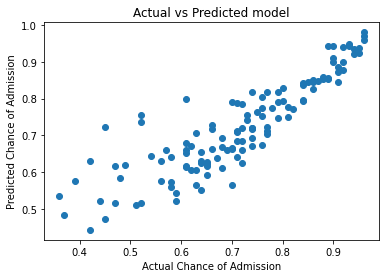

In [25]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Chance of Admission')
plt.ylabel('Predicted Chance of Admission')
plt.title('Actual vs Predicted model')
plt.show()

### Model Evaluation

* Mean absolute error (MAE) : Represents average error

* Mean squared error (MSE) : Similar to MAE but noise is exaggerated and large errors are "punished". It is harder to interpret than MAE as it's not in base units, however, it is generally more popular.

* Root mean squared error (RMSE) : Most popular metric, similar to MSE, however the result is square rooted to make it more interpretable as it's in base units. It is recommended that RMSE be used as the primary metric to inerpret your model. `

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [27]:
y_pred = regression.predict(x_test)

In [28]:
# MAE
mean_absolute_error(y_test,y_pred)

0.048255905491372826

In [29]:
# MSE
mean_squared_error(y_test,y_pred)

0.004924522822246027

In [30]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

0.07017494440500845

# You have successfully completed building Linear Regression model

Now let's check if our model is overfitting our data using regularization

### Let's see if our model is overfitting our training data.

## Regularization

When we use regression models to train some data, there is a good chane that the model will overfit the given data set. Regularization helps sort this overffitting problem by restricting the degree of freedom of a given equation i.e. simply reducing the number of degrees of a polynomial function by reducing their corresponding weights.

In a linear equation, we do not want huge weights/coefficients as a small change in weight can make a large difference for the dependent variable(Y). So, regularization constraints the weights of such features to avoid overfitting.

To regularize the model, a Shrinkage penalty is added to the cost function. Let's see different types of regularizations in regression:

* LASSO
* RIDGE
* ELASTICNET (Less popular)



### LASSO (Least Absolute Shrinkage and Selection Operator) Regression (L1 Form)

LASSO regression penalizes the model based on the sum of magnitude of the coefficients. The regularization term is given by

regularization = λ * Σ ǀ βj ǀ 

Where, λ is the shrinkage factor.

### Ridge Regression (L2 Form)

Ridge regression penalizes the model based on the sum of squares of magnitude of the coefficients. The regularization term is given by

regularization = λ *  Σ ǀ β²j ǀ

Where, λ is the shrinkage factor.

### Difference between Ridge an Lasso

Ridge regression shrinks the coefficients for those predictors which contribute very less in the model but have huge weights, very close to zero. But it never makes them exactly zero. Thus, the final model will still contain all those predictors, though with less weights. This help in interpreting the model very well. This is where Lasso regression differs with Ridge regression. In Lasso, the L1 penalty does reduce some coefficients exactly to zero when we use a sufficiently large tuning parameter λ. So, in addition to regularizing, lasso also performs feature selection. 

### Why use Regularization?

Regularization helps to reduce the variance of the model, without a substantial increase in the bias. If there is variance in the model that means that the model won't fit well for dataset different than training data. The tuning parameter λ controls this bias and variance tradeoff. When the value of λ is increased upto a certain limit, it reduces the variance without losing any important properties in the data. But after the certain limit, the model will start losing some important properties which will increase the bias in the data. Thus, the selection of the good value of λ is the key. The value of λ is selected using cross- validation methods. A set of λ is selected and cross- validation error is calculated for each value of λ and that value of λ is selected for which the cross- validation error is minimum.

In [31]:
from sklearn.linear_model import Ridge,Lasso, RidgeCV, LassoCV

### Lasso Regularization

In [32]:
# LassoCV will return best alpha after max iteration
# Normalize is subtracting the mean and dividing by the l2-norm
lasscv = LassoCV(alphas = None, max_iter = 100, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(max_iter=100, normalize=True)

In [33]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

5.940335977550052e-05

In [34]:
# Now that we have best parameter, let's use lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=5.940335977550052e-05)

In [35]:
lasso_reg.score(x_test, y_test)

0.7740297409091088

### Using Ridge regression model

In [36]:
# RidgeCV will return best alpha and coefficients after performing 10 cross validations.

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01), normalize = True)

ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [37]:
ridgecv.alpha_

0.011

In [38]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.011)

In [39]:
ridge_model.score(x_test, y_test)

0.7739130186264376

We got around same r2 sqare usingRidge regression as well. So, it's safe to say there is no overfitting.

So, we can see by using different type of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.